## Exercise 11 - Monte Carlo Methods

Marit Svendby Otervik

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### 1. Radioactive decay chain

In [2]:
tau = 3.052*60
t_stop = 1200
TI_init = 1000
Pb_init = 0

In [3]:
def p(t):
    return 1 - 2**(-t/tau)

In [4]:
decay_limit =np.random.random(TI_init)

nTI = np.empty(t_stop)
nPb = np.empty(t_stop)
nTI[0] = TI_init
nPb[0] = Pb_init

for t in range(1,t_stop):
    decayed_TI = len(decay_limit[p(t)>decay_limit])
    nTI[t] = TI_init - decayed_TI
    nPb[t] = Pb_init + decayed_TI

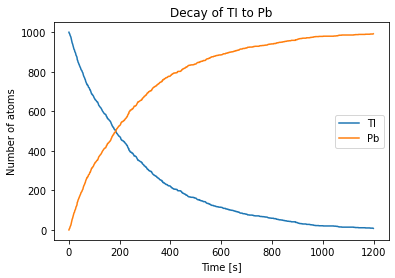

In [5]:
plt.figure()
plt.title("Decay of TI to Pb")
plt.plot(nTI, label = "TI")
plt.plot(nPb, label = "Pb")
plt.xlabel("Time [s]")
plt.ylabel("Number of atoms")
plt.legend()
plt.show()

##### Means of the inverse transform method

Probability distribution:

$$
p(t) = 2^{-t/\tau}\cdot \frac{ln(2)}{\tau}
$$

$$
P(t) = \int_0^t p(t') dt' =\frac{ln(2)}{\tau} \int_0^t 2^{-t'/\tau} dt' = 1 - 2^{-t/\tau} = y
$$

Inverting and solving for $t$:

$$t(y) = P^{-1}(y) = -\frac{\tau \cdot ln(1-y)}{ln(2)}$$

In [6]:
def inverse(y):
    return - tau*np.log(1-y)/np.log(2)

In [7]:
y = np.random.random(TI_init)
times_of_decay = inverse(y)

In [8]:
nTI_2 = np.ones(t_stop)*TI_init

for t in range(1,t_stop):
    decayed_TI_2 = len(times_of_decay[t>times_of_decay])
    nTI_2[t] = TI_init - decayed_TI_2

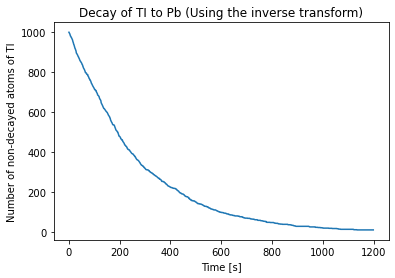

In [9]:
plt.figure()
plt.title("Decay of TI to Pb (Using the inverse transform)")
plt.plot(nTI_2)
plt.xlabel("Time [s]")
plt.ylabel("Number of non-decayed atoms of TI")
plt.show()

### 2. Monte Carlo integration: hit/miss vs mean value method

In [10]:
def f(x):
    return (np.sin(1/(1-x)))**2

In [11]:
x = np.linspace(0,2,100)
fvals = f(x)

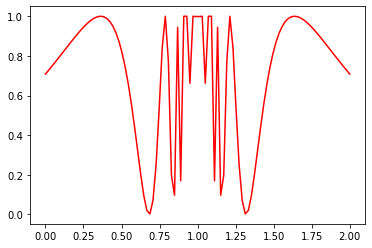

In [12]:
plt.figure()
plt.plot(x,fvals,'r-')
plt.show()

##### The hit/miss method

In [13]:
N = 500
I = np.zeros(N)

for i in range(N):
    k = 0
    n = 100000
    x = np.random.random(n) * 2
    y = np.random.random(n)
    states = y < f(x)
    k = np.sum(1*states)
    I[i] = 2 * k / n

I_mean = np.mean(I)
I_std = np.std(I)
print("Mean value of integrals:",I_mean)
print("Standard deviation:", I_std)

Mean value of integrals: 1.3466380800000002
Standard deviation: 0.003029436302944826


##### The mean value method

In [14]:
n = 100000
x = np.random.random(n) * 2
f_tot = f(x)
I = 2/n * np.sum(f_tot)

I_std = 2 * np.sqrt(np.var(f_tot/n))
print("Integral value:",I)
print("Standard deviation",I_std)

Integral value: 1.3415119627040433
Standard deviation 6.559443171169207e-06


Both integral methods return similar values. One can see that the error of the mean value method is a lot smaller than for the hit/miss method. Hence, that would be the preferable method in this case.

### 3. Monte Carlo integration in high dimensions

##### 2 dimensions

In [15]:
def f_xy(x,y):
    states = x**2 + y**2 <= 1
    return np.sum(1*states)

In [16]:
#using mean value method:
N = 1000000
x = np.random.random(N) * 2 -1
y = np.random.random(N) * 2 -1

V = 2 * 2

I = V/N * f_xy(x,y)
print("2D disk:",I)

2D disk: 3.1443239999999997


##### 10 dimensions

In [17]:
def f_10D(coords):
    states = np.sum(coords**2, axis=0) <= 1
    return np.sum(1*states)

In [18]:
coords = np.random.random((10,N)) * 2 -1
V = 2**10
I_10D = V/N * f_10D(coords)
print("10D sphere:",I_10D)

10D sphere: 2.556928


### 4. Monte Carlo integration with importance sampling

In [19]:
N = 100
a = 0.001 #can't be 0, then f and w would go to infinity
b = 1
x = np.linspace(a,b,N)
dx = x[1]-x[0]
f_x = x**(-1/2) / (np.exp(x)+1)
w_x = 1/np.sqrt(x)

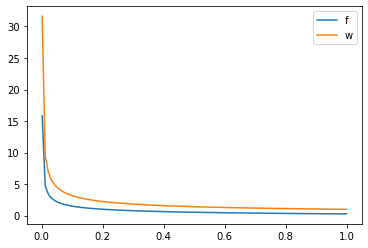

In [20]:
#plotting to compare the two functions
plt.figure()
plt.plot(x,f_x,label = 'f')
plt.plot(x,w_x, label = 'w')
plt.legend()
plt.show()

In [21]:
#Normalization factor
w_int = np.sum(w_x) * dx

#Computing the integral
I = 1/N * np.sum(f_x / w_x) * w_int
print("Integral =",I)

Integral = 0.822257076338169
